<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Intermediate_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intermediate SQL

This intermediate-level course will teach you several key functions necessary to wrangle, filter, and categorize information in a relational database, expand your SQL toolkit, and answer complex questions. You will learn the robust use of CASE statements, subqueries, and window functions—all while discovering some interesting facts about soccer using the European Soccer Database.

**course from DataCamp** exercises resolved by myself

##We'll take the CASE

####Selecting from the European Soccer Database
For this course, we will be using the European Soccer Database -- a relational database that contains data about over 25,000 matches, 300 teams, and 10,000 players in Europe between 2008 and 2016. The data is contained within 4 tables -- country, league, team, and match. Selecting from tables in this database is pretty simple. The query you see here gives you the number of matches played in each of the 11 leagues listed in the "League" table.

```
SELECT
l.name AS league,
COUNT(m.country_id) as matches
FROM league AS l
LEFT JOIN match AS m
ON l.country_id = m.country_id
GROUP BY l.name;
```
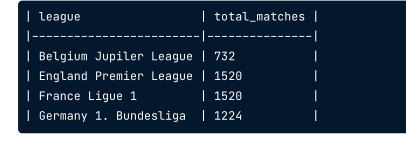



Let's say we want to compare the number of home team wins, away team wins, and ties in the 2013/2014 season. The "Match" table has two relevant columns -- home_goal, and away_goal.

```
SELECT
date,
id,
home_goal,
away_goal
FROM match
WHERE season = '2013/2014';
```

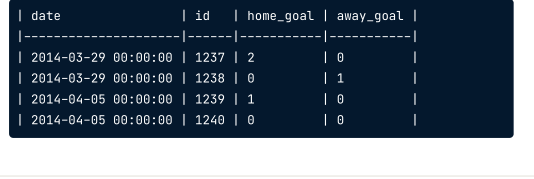


We can potentially add filters to the WHERE clause selecting wins, loses, and ties as separate queries, but that's not very efficient if you want to compare these separate outcomes in a single data set.

```
SELECT
date,
id,
home_goal,
away_goal
FROM match
WHERE season = '2013/2014'
AND home_team_goal > away_team_goal;
```
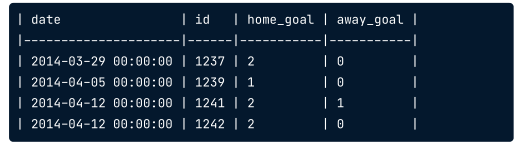


####CASE statements
This is where the CASE statement comes in. Case statements are SQL's version of an "IF this THEN that" statement. Case statements have three parts -- a WHEN clause, a THEN clause, and an ELSE clause. The first part -- the WHEN clause -- tests a given condition, say, x = 1. If this condition is TRUE, it returns the item you specify after your THEN clause. You can create multiple conditions by listing WHEN and THEN statements within the same CASE statement. The CASE statement is then ended with an ELSE clause that returns a specified value if all of your when statements are not true. When you have completed your statement, be sure to include the term END and give it an alias. The completed CASE statement will evaluate to one column in your SQL query.

```
CASE WHEN x = 1 THEN 'a'
WHEN x = 2 THEN 'b'
ELSE 'c' END AS new_column
```

```
SELECT
id,
home_goal,
away_goal,
CASE WHEN home_goal > away_goal THEN 'Home Team Win'
WHEN home_goal < away_goal THEN 'Away Team Win'
ELSE 'Tie' END AS outcome
FROM match
WHERE season = '2013/2014';
```

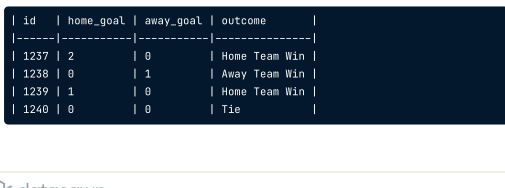

####CASE WHEN
In this example, we use a CASE statement to create a new variable that identifies matches as home team wins, away team wins, or ties. A new column is created with the appropriate text for each match given the outcome.

####Basic CASE statements
What is your favorite team?

The European Soccer Database contains data about 12,800 matches from 11 countries played between 2011-2015! Throughout this course, you will be shown filtered versions of the tables in this database in order to better explore their contents.

In this exercise, you will identify matches played between FC Schalke 04 and FC Bayern Munich. There are 2 teams identified in each match in the hometeam_id and awayteam_id columns, available to you in the filtered matches_germany table. ID can join to the team_api_id column in the teams_germany table, but you cannot perform a join on both at the same time.

However, you can perform this operation using a CASE statement once you've identified the team_api_id associated with each team!

* Select the team's long name and API id from the teams_germany table.
* Filter the query for FC Schalke 04 and FC Bayern Munich using IN, giving you the team_api_IDs needed for the next step.

In [ ]:
SELECT
	-- Select the team long name and team API id
	team_long_name,
	team_api_id
FROM teams_germany
-- Only include FC Schalke 04 and FC Bayern Munich
WHERE team_long_name in ('FC Bayern Munich', 'FC Schalke 04');

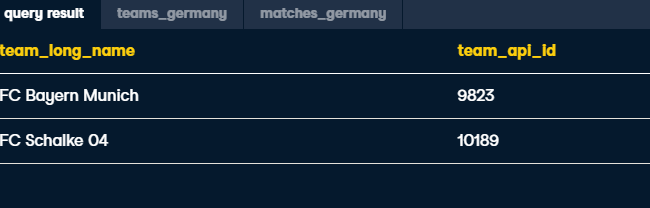

* Create a CASE statement that identifies whether a match in Germany included FC Bayern Munich, FC Schalke 04, or neither as the home team.
* Group the query by the CASE statement alias, home_team.

In [ ]:
-- Identify the home team as Bayern Munich, Schalke 04, or neither
SELECT 
	case when hometeam_id = 10189 then 'FC Schalke 04'
        when hometeam_id = 9823 then 'FC Bayern Munich'
         ELSE 'Other' END AS home_team,
	COUNT(id) AS total_matches
FROM matches_germany
-- Group by the CASE statement alias
GROUP BY home_team;

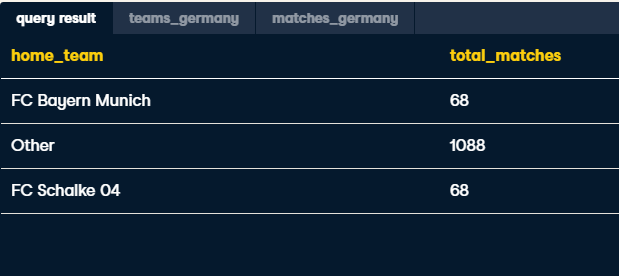

####CASE statements comparing column values
Barcelona is considered one of the strongest teams in Spain's soccer league.

In this exercise, you will be creating a list of matches in the 2011/2012 season where Barcelona was the home team. You will do this using a CASE statement that compares the values of two columns to create a new group -- wins, losses, and ties.

In 3 steps, you will build a query that identifies a match's winner, identifies the identity of the opponent, and finally filters for Barcelona as the home team. Completing a query in this order will allow you to watch your results take shape with each new piece of information.

The matches_spain table currently contains Barcelona's matches from the 2011/2012 season, and has two key columns, hometeam_id and awayteam_id, that can be joined with the teams_spain table. However, you can only join teams_spain to one column at a time.

* Select the date of the match and create a CASE statement to identify matches as home wins, home losses, or ties.

In [ ]:
SELECT 
	-- Select the date of the match
	date,
	-- Identify home wins, losses, or ties
	case when home_goal > away_goal then 'Home win!'
        when home_goal < away_goal then 'Home loss :(' 
        else 'Tie' end as outcome
FROM matches_spain;

* Left join the teams_spain table team_api_id column to the matches_spain table awayteam_id. This allows us to retrieve the away team's identity.
* Select team_long_name from teams_spain as opponent and complete the CASE statement from Step 1.

In [ ]:
SELECT 
	m.date,
	--Select the team long name column and call it 'opponent'
	t.team_long_name AS opponent, 
	-- Complete the CASE statement with an alias
	case when m.home_goal > m.away_goal then 'Home win!'
        when m.home_goal < m.away_goal then 'Home loss :('
        else 'Tie' end as outcome
FROM matches_spain AS m
-- Left join teams_spain onto matches_spain
left join teams_spain AS t
on m.awayteam_id = t.team_api_id;

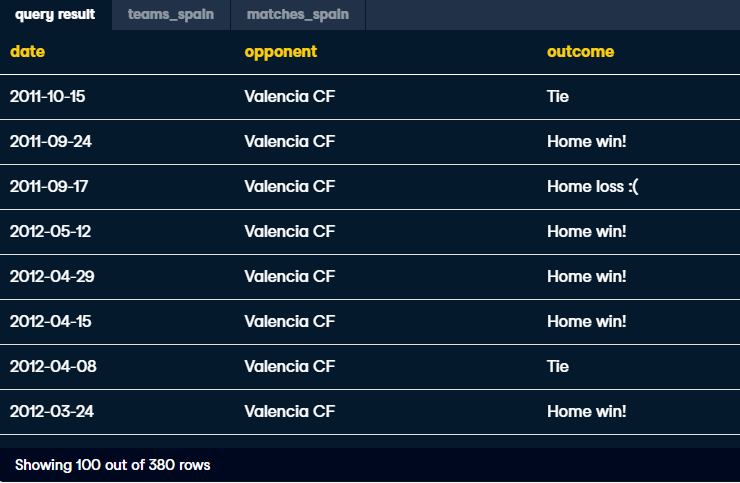

* Complete the same CASE statement as the previous steps.
* Filter for matches where the home team is FC Barcelona (id = 8634).

In [ ]:
SELECT 
	m.date,
	t.team_long_name AS opponent,
    -- Complete the CASE statement with an alias
	case when m.home_goal > m.away_goal then 'Barcelona win!'
        when m.home_goal < m.away_goal then 'Barcelona loss :(' 
        else 'Tie' end as outcome 
FROM matches_spain AS m
LEFT JOIN teams_spain AS t 
ON m.awayteam_id = t.team_api_id
-- Filter for Barcelona as the home team
WHERE m.hometeam_id = 8634; 

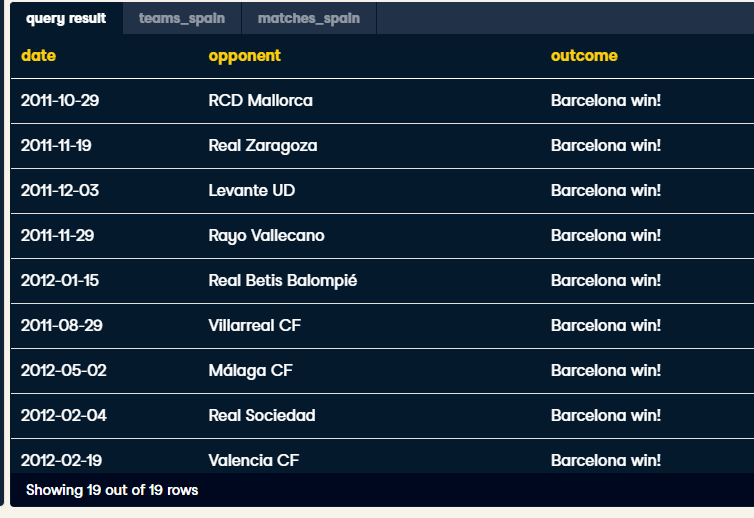

CASE statements comparing two column values part 2
Similar to the previous exercise, you will construct a query to determine the outcome of Barcelona's matches where they played as the away team. You will learn how to combine these two queries in chapters 2 and 3.

Did their performance differ from the matches where they were the home team?

* Complete the CASE statement to identify Barcelona's away team games (id = 8634) as wins, losses, or ties.
* Left join the teams_spain table team_api_id column on the matches_spain table hometeam_id column. This retrieves the identity of the home team opponent.
* Filter the query to only include matches where Barcelona was the away team.

In [ ]:
-- Select matches where Barcelona was the away team
SELECT  
	m.date,
	t.team_long_name AS opponent,
	case when  m.home_goal < m.away_goal then 'Barcelona win!'
        WHEN m.home_goal > m.away_goal then 'Barcelona loss :(' 
        else 'Tie' end as outcome
FROM matches_spain AS m
-- Join teams_spain to matches_spain
LEFT JOIN teams_spain AS t 
ON m.hometeam_id = t.team_api_id
WHERE m.awayteam_id	 = 8634;

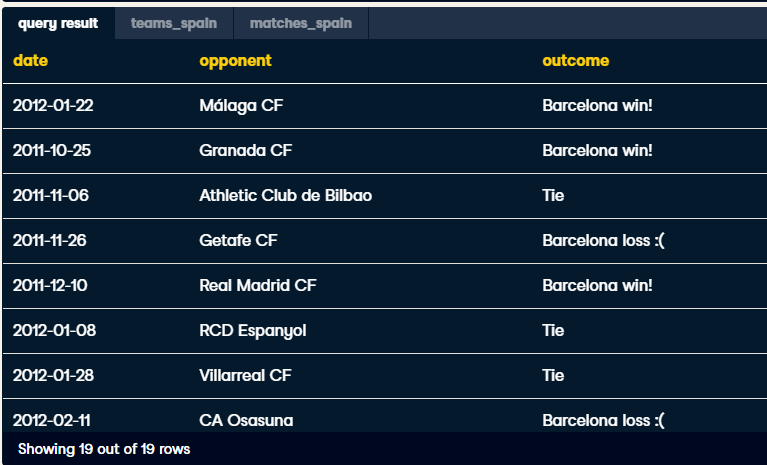